# GSM8K

### By Certainty

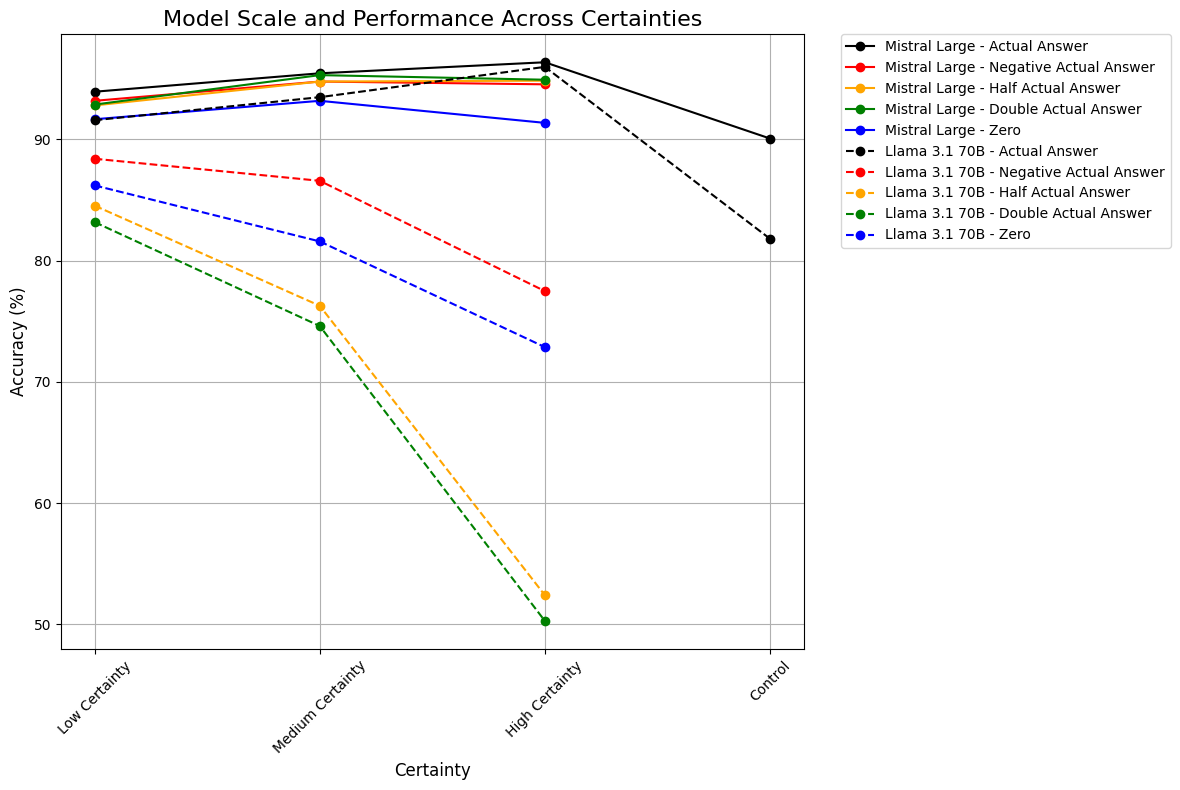

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.csv")

models = data["Model"].unique()
certainties = data["Certainty"].unique()
answer_types = data["Answer Type"].unique()

plt.figure(figsize=(12, 8))
linestyles = ['solid', 'dashed', 'dashdot']
colors = ['black', 'red', 'orange', 'green', 'blue', 'purple']

for i, model in enumerate(models):
    model_data = data[data['Model'] == model]
    for j, answer_type in enumerate(answer_types):
        subset = model_data[model_data['Answer Type'] == answer_type]
        plt.plot(subset['Certainty'], subset['Accuracy'],
                 label=f"{model} - {answer_type}",
                 linestyle=linestyles[i % len(linestyles)],
                 color=colors[j % len(colors)],
                 marker='o')

plt.title("Model Scale and Performance Across Certainties", fontsize=16)
plt.xlabel("Certainty", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)

plt.tight_layout()
plt.savefig("model_performance_plot_by_certainty.png", dpi=300)
plt.show()

### By Answer Type

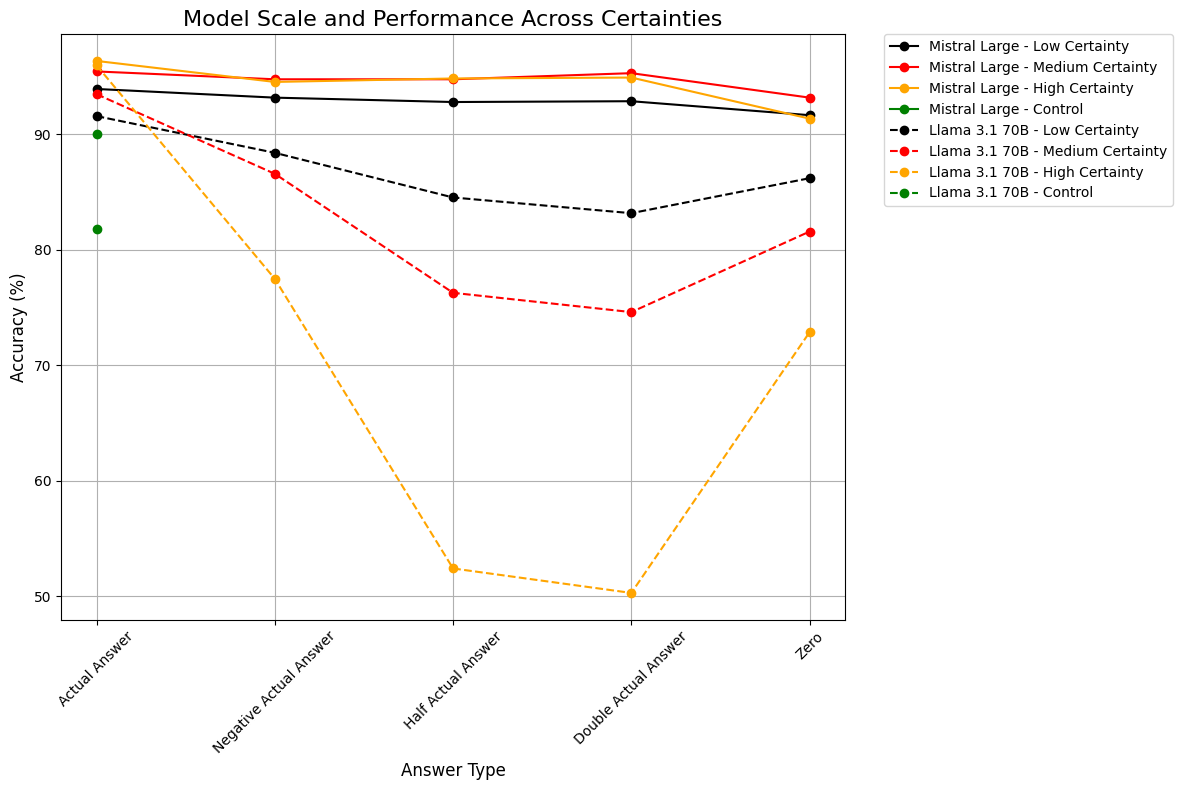

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.csv")

models = data["Model"].unique()
certainties = data["Certainty"].unique()
answer_types = data["Answer Type"].unique()

plt.figure(figsize=(12, 8))
linestyles = ['solid', 'dashed', 'dashdot']
colors = ['black', 'red', 'orange', 'green', 'blue', 'purple']

for i, model in enumerate(models):
    model_data = data[data['Model'] == model]
    for j, certainty in enumerate(certainties):
        subset = model_data[model_data['Certainty'] == certainty]
        plt.plot(subset['Answer Type'], subset['Accuracy'],
                 label=f"{model} - {certainty}",
                 linestyle=linestyles[i % len(linestyles)],
                 color=colors[j % len(colors)],
                 marker='o')

plt.title("Model Scale and Performance Across Certainties", fontsize=16)
plt.xlabel("Answer Type", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)

plt.tight_layout()
plt.savefig("model_performance_plot_by_answer_type.png", dpi=300)
plt.show()